Notebook where the code for the heston model is developed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.lines import Line2D
from scipy.special import erfinv, erf
from scipy.optimize import minimize_scalar

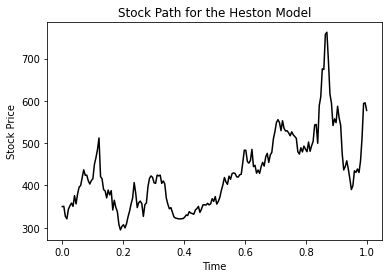

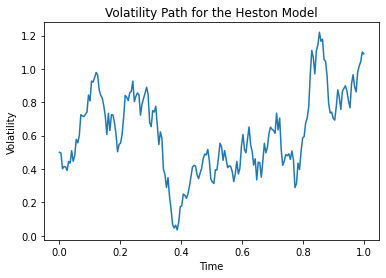

In [5]:
s0=350
T=1
t= np.linspace(0,T,200)
step=t[1]-t[0]
stock = s0
mu=0.1
r = mu
rho=0.6
theta = 0.5
delta=1
k=1
sigma=[0.5]
stock=[s0]

for i in range(len(t)-1):
    Z = np.random.multivariate_normal(np.array([0,0]), cov = np.array([[1,rho],[rho,1]]))
    snext = stock[i] * np.exp((mu- 0.5 * sigma[i]**2)*step + sigma[i]*np.sqrt(step)*Z[0])
    signext = sigma[i] - delta*(sigma[i] - theta)*step + k*np.sqrt(step)*Z[1]

    sigma.append(signext)
    stock.append(snext)

plt.plot(t,stock,color='black')
plt.title('Stock Path for the Heston Model')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.savefig("HestonStock.png", dpi=300)
plt.show()


plt.plot(t,sigma)
plt.title('Volatility Path for the Heston Model')

plt.xlabel('Time')
plt.ylabel('Volatility')
plt.savefig("HestonVol.png", dpi=300)
plt.show()

In [8]:
def Stochastic_Volatility(mu,sig0,T,s0,delta,theta,k):
    s=[]
    sigs=[]
    sigma = sig0
    t= np.linspace(0,T,100)
    step=t[1]-t[0]
    stock = s0
    rho=0.7
    for i in range(len(t)):
      Z = np.random.multivariate_normal(np.array([0,0]), cov = np.array([[1,rho],[rho,1]]))
      stock = stock * np.exp((mu- 0.5 * sigma**2)*step + sigma*np.sqrt(step)*Z[0])
      sigma = sigma - delta*(sigma - theta)*step +k*np.sqrt(step) *Z[1]
    return stock



def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 / 2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)